# Project: No-Show Appointments Data Analysis

# Introduction

##### Tip: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

##### A number of characteristics about the patient are included in each row.

##### ‘ScheduledDay’ tells us on what day the patient set up their appointment.

##### ‘Neighborhood’ indicates the location of the hospital.

##### ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

##### Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

#### Statement Of The Questions
#### Q1: What are the percentages of Males and Females who have enrolled in Brasilian welfare program or received SMS?
#### Q2: What are the percentages of Males and Females who have disease?
#### Q3. What are the precenctages of Females and Females who showed-up to their appointment?
#### Q4.  What is the relationship between patients with diseases and 'No_show' variable?
#### Q5. What are the characterstics of patients who showed-up and who didn't?
#### Q6. The relationship between Patients who showed-up and who received SMS.
#### Q7. The relationship between Patients who showed-up and have enrolled in Brasilian welfare program.
    

In [179]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
%matplotlib inline

#### Data Wrangling

#### General Properties

In [181]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


### Notes or inference from the above analysis:

##### We are lucky, we do NOT hvae Missing Data :)
##### We need to rename the last column 'No-show' and replace it with 'no_show'
##### Maybe we need to change the data type of 'ScheduledDay' and 'AppointmentDay' to be datetime
##### Maybe we need to change the data type of 'Handcap' to be Categorical


In [184]:
# Now checking some basis statistical values.

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [185]:
# the MIN Age is -1, lets look at this observation:
df[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


##### We can drop this observation later.

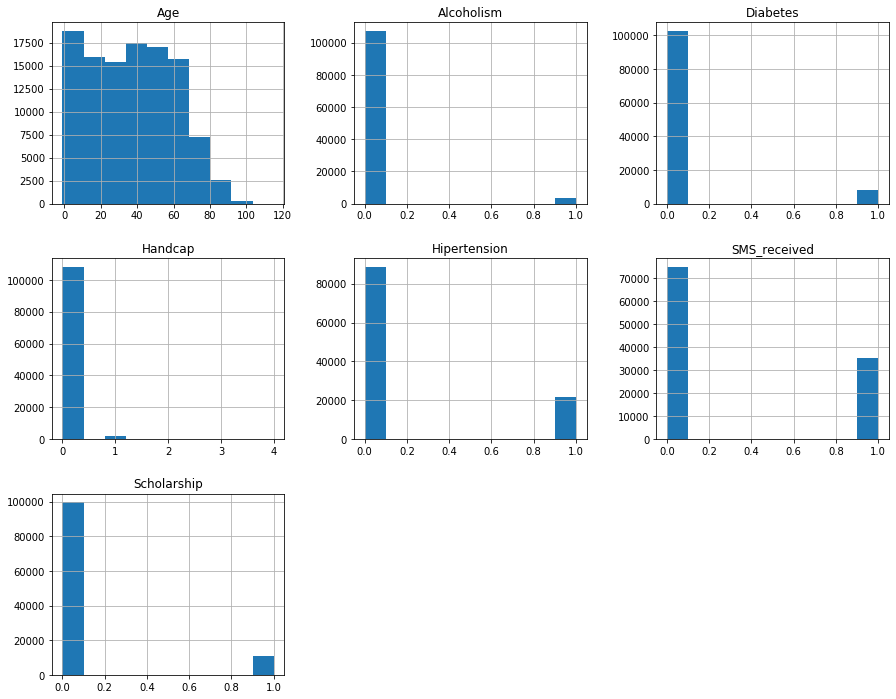

In [187]:
df.hist(column=['Gender', 'Age','Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received'],figsize=(15,12));

#### Do we have ages == 0?

In [189]:
len(df[df.Age == 0])

3539

### inference from above analysis

#### We have 3539 Patients with the Age = 0. 
#### Maybe they are children and their age is less than 1 year or maybe the Age of the patient is not known.
#### Let's check the hist()  when the Age > 0


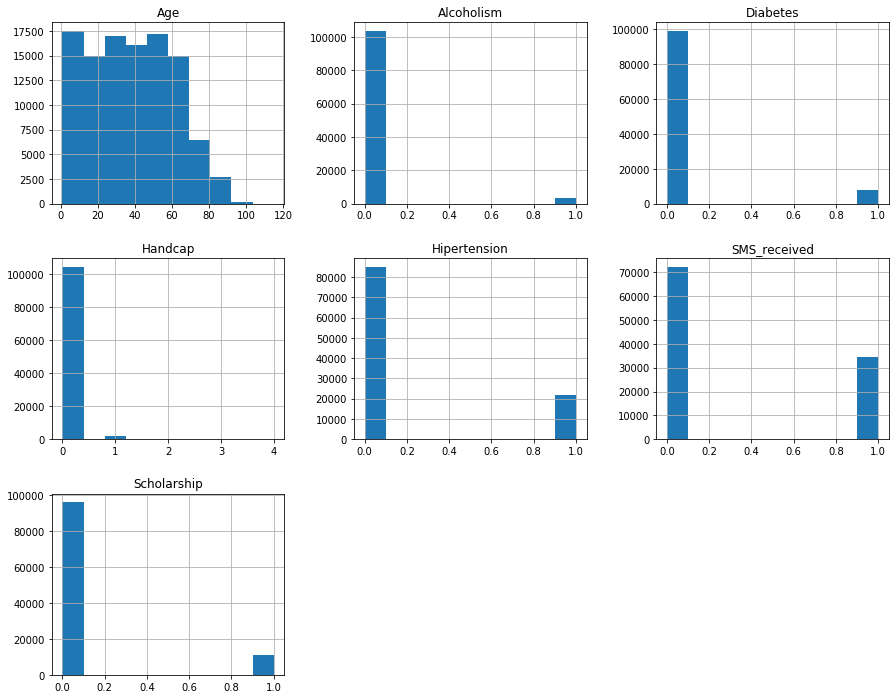

In [190]:
df_no_zero_age = df[df.Age > 0]

df_no_zero_age.hist(column=['Gender', 'Age','Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received'],figsize=(15,12));

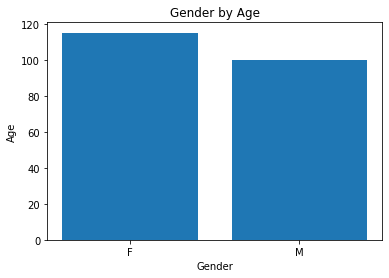

In [191]:
plt.bar(df_no_zero_age.Gender, df_no_zero_age.Age)
plt.xlabel('Gender')
plt.ylabel("Age")
plt.title('Gender by Age');

#### lets check the hist() of the dataset when the age == 0

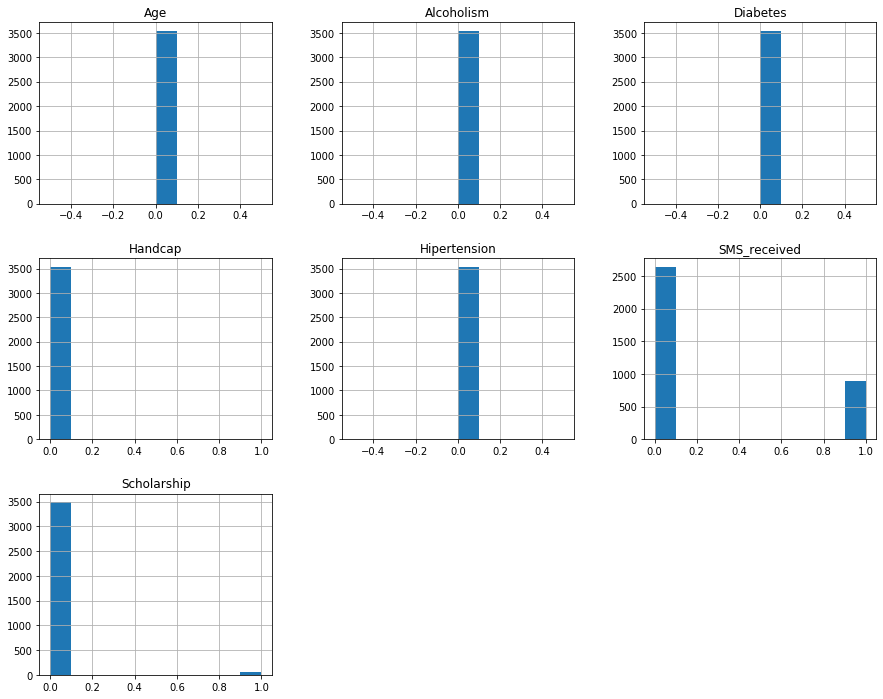

In [193]:
df_zero_age = df[df.Age == 0]

df_zero_age.hist(column=['Gender', 'Age','Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received'],figsize=(15,12));

#### It looks like all patients with the age = 0 share the same charachtaristcs that they are not diagnosed with any diseases (No Hipertension, No Diabetes, No Alcoholism, No Handcap), some of them have received SMS and some of them have Sholarship. So I'm not going to drop them since it seems that they represent a group of patients with some common charachtersitcs, maybe children below the age of 1 year.

#### check for duplicates

In [195]:
df.duplicated().sum()

0

#### After discussing the structure of the data and any problems that need to be cleaned, now we will be doing the cleaning steps in the second part of this section.


##### 1. change the data type of 'ScheduledDay' and 'AppointmentDay' to be datetime

In [198]:
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')

In [199]:
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')

##### Check changes of data types:

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

##### 2. Renaming the last column 'No-show' to be 'No_show'
##### 3. Drop not neccessary columns: 'PatientId' or 'AppointmentID'

In [203]:

df.rename(columns={"No-show": "No_show"}, inplace=True)

In [204]:

df.drop(['AppointmentID'], 1, inplace = True)

In [205]:
# check changes
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [206]:
df.duplicated().sum()

618

#### It seems that PatientID and AppointmentID creates a unique ID in our DF, when we drop the AppointmentID, and keep the PatienID, we get duplicates (618). This means that some patients have more than one appointment. Later we can look at the number of appointments of each patient. and see how many times do the patients show up out of the total number of appointments comparing to the number of patients who have only one appointment, this can be done in a futur work.

In [207]:
# Drop the observation with Age of -1
df.drop(df.query('Age == "-1"').index, inplace=True)

In [208]:
#confirm that the Age == -1 is dropped
df.query('Age == "-1"')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


## Exploratory Data Analysis

### Q1: What are the percentages of Males and Females who have enrolled in Brasilian welfare program or received SMS?

#### First we find the total number of Males and Females all over the dataset

Text(0, 0.5, 'number of Patients')

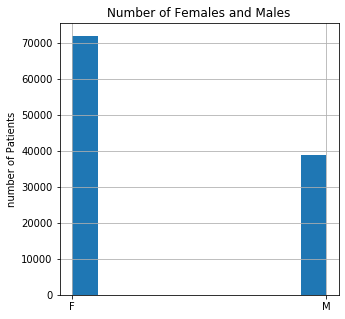

In [210]:
df.Gender.hist(figsize=(5, 5))
plt.title('Number of Females and Males')
plt.ylabel('number of Patients')

#plt.title('Gender by Age');

#pd.crosstab(df.Gender, len(df), colnames=['Number of Patients'])

#### From the graph above, it is clear that the number of females is approximately twice the number of males in our sample.


#### 1.1 Scholarship by Gender

In [211]:
df_sch = df[df['Scholarship'] == 1]
pd.crosstab(df_sch['Scholarship'], df_sch['Gender'], rownames=['Scholarship'], colnames=['Gender'], normalize='index').round(2)


Gender,F,M
Scholarship,,
1,0.82,0.18


In [212]:
df_sch.Age.mean()

30.616241598379524

##### The function below will be used to plot all mostof the needed histograms 
##### it takes 4 args
##### 1. the dataset, 2. feature one, 3. feature two, 4. the title of the graph
##### it shows the graph as the return.

In [213]:
def create_hist(data_set, var1, var2, graph_title):
    for name, group in data_set.groupby(var1):
        plt.hist(group[var2], label=name)
        plt.title(graph_title)
        plt.xlabel(var2)
        plt.ylabel(var1)
        plt.show();
    

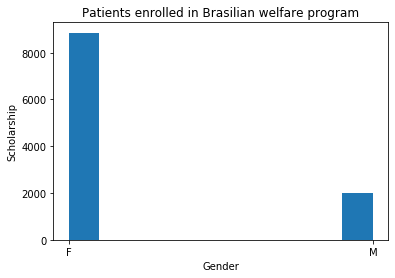

In [214]:
create_hist(df_sch,'Scholarship','Gender', "Patients enrolled in Brasilian welfare program");

#### 82% of patients with Scholarship are Females, and only 18% are Males.

### 1.2 SMS received by Gender

In [215]:

df_sms = df[df['SMS_received'] == 1]
pd.crosstab(df_sms['SMS_received'], df_sms['Gender'], rownames=['Scholarship'], colnames=['Gender'], normalize='index').round(2)


Gender,F,M
Scholarship,,
1,0.68,0.32


In [216]:
df_sms.Age.mean()

37.513809819063184

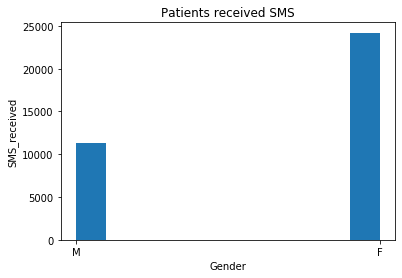

In [217]:
create_hist(df_sms,'SMS_received','Gender', "Patients received SMS");


#### 68% of patients who received SMS are Females, and only 32% are Males.

### Q2: What are the percentages of Males and Females who have  disease?

### 2.1 Hipertension

In [218]:
df_hip = df[df['Hipertension'] == 1]

In [219]:
pd.crosstab(df_hip['Hipertension'], df_hip['Gender'], rownames=['Hipertension'], colnames=['Gender'], normalize='index').round(2)

Gender,F,M
Hipertension,,
1,0.7,0.3


In [220]:
df_hip.Age.mean()

60.61359570661896

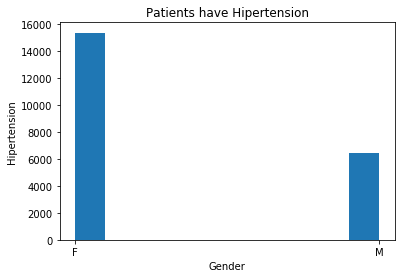

In [221]:
create_hist(df_hip,'Hipertension','Gender', "Patients have Hipertension");


#### 70% of patients have Hipertension are Females, and only 30% are Males.

### 2.2 Diabetes


In [222]:

df_dia = df[df['Diabetes'] == 1]

In [223]:
pd.crosstab(df_dia['Diabetes'], df_dia['Gender'], rownames=['Diabetes'], colnames=['Gender'], normalize='index').round(2)


Gender,F,M
Diabetes,,
1,0.71,0.29


In [224]:
df_dia.Age.mean()

61.37252927105627

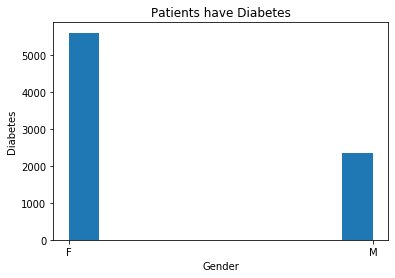

In [225]:
create_hist(df_dia,'Diabetes','Gender', "Patients have Diabetes");


#### 71% of patients have Diabetes are Females, and only 29% are Males.

### 2.3 Alcoholism

In [226]:

df_alc = df[df['Alcoholism'] == 1]
pd.crosstab(df_alc['Alcoholism'], df_alc['Gender'], rownames=['Alcoholism'], colnames=['Gender'], normalize='index').round(2)


Gender,F,M
Alcoholism,,
1,0.36,0.64


In [227]:
df_alc.Age.mean()

49.59375

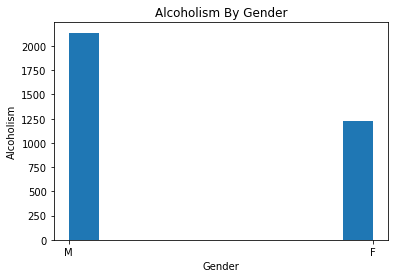

In [228]:
create_hist(df_alc,'Alcoholism','Gender', "Alcoholism By Gender");
    

#### We can see that 36% of Alcoholism are Females and 64% are Males.

### 2.4 Handcap

In [229]:

df_hcap = df[df['Handcap'] >= 1]
pd.crosstab(df_hcap['Gender'], df_hcap['Handcap'], rownames=['Gender'], colnames=['Handcap'], normalize='index').round(3)


Handcap,1,2,3,4
Gender,,,,
F,0.916,0.081,0.002,0.001
M,0.905,0.082,0.011,0.002


In [230]:
df_hcap.Age.mean()

50.5417224453369

In [231]:
pd.crosstab(df_hcap['Gender'], df_hcap['Handcap'], rownames=['Gender'])

Handcap,1,2,3,4
Gender,,,,
F,1181,105,3,1
M,861,78,10,2


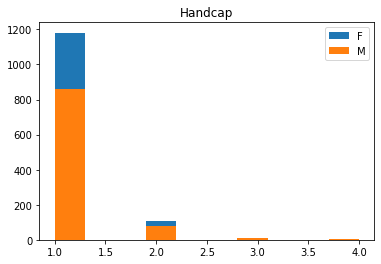

In [232]:

for name, group in df_hcap.groupby('Gender'):
    plt.hist(group['Handcap'], label=name)
    plt.legend()
    plt.title('Handcap');

#### (91.6%) of Females and (90.5%) of Males are diagnosed with Handicap of type 1, and the others came with Handicap of types (2, 3, and 4)

## Q3. What are the precenctages of Females and Females who showed-up to their appointment?

### No-show by Gender

##### Be careful about the encoding of the last column ('No_show'): it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [233]:

df_show = df[df['No_show'] == 'No']
pd.crosstab(df_show['No_show'], df_show['Gender'], rownames=['No_show'], colnames=['Gender'], normalize='index').round(2)

Gender,F,M
No_show,,
No,0.65,0.35


In [234]:
df_show.Age.mean()

37.790504154999034

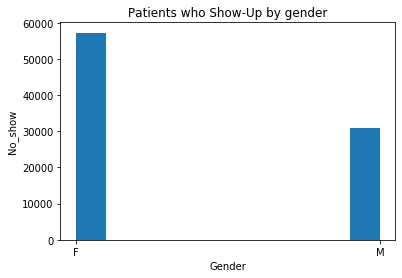

In [235]:
create_hist(df_show,'No_show','Gender', "Patients who Show-Up by gender");


#### 65% who showed-up are Females, while 35% are males.

## Q4.  What is the relationship between patients with diseases and 'No_show' variable?

#### Let's find number and percentages of patients who showed-up and who didn't show-up

In [236]:
pd.crosstab(df.No_show, len(df), colnames=['Number of Patients'])

Number of Patients,110526
No_show,
No,88207
Yes,22319


In [237]:
print('Percentages of Patients who showed up and who did not:')
print((df['No_show'].value_counts(normalize=True) * 100).round());

Percentages of Patients who showed up and who did not:
No     80.0
Yes    20.0
Name: No_show, dtype: float64


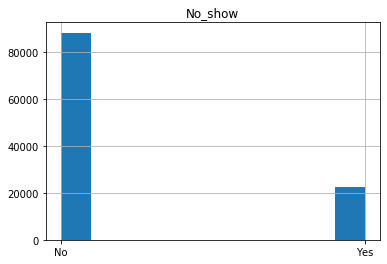

In [238]:
df['No_show'].hist()
plt.title("No_show");


#### 80% of patient have showed-up while 20% did NOT.

### 4.1 Hipertension


In [239]:

pd.crosstab(df_hip['Hipertension'], df_hip['No_show'], rownames=['Hipertension'], colnames=['No_Show'], normalize='index').round(2)

No_Show,No,Yes
Hipertension,,
1,0.83,0.17


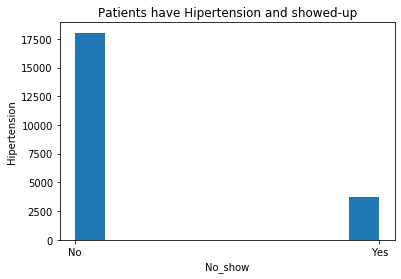

In [240]:
create_hist(df_hip,'Hipertension','No_show', "Patients have Hipertension and showed-up");

#### 83% of patients with Hipertension showed-up, while 17% of them didn't show-up.

### 4.2 Diabetes

In [241]:
pd.crosstab(df_dia['Diabetes'], df_dia['No_show'], rownames=['Diabetes'], colnames=['No_show'], normalize='index').round(2)

No_show,No,Yes
Diabetes,,
1,0.82,0.18


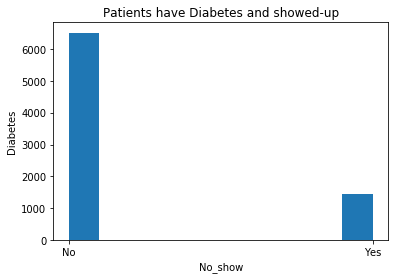

In [242]:
create_hist(df_dia,'Diabetes','No_show', "Patients have Diabetes and showed-up");


#### 82% of patients with Diabetes showed-up, while 18% of them didn't show-up.

### 4.3 Alcoholism

In [243]:
pd.crosstab(df_alc['Alcoholism'], df_alc['No_show'], rownames=['Alcoholism'], colnames=['No_show'], normalize='index').round(2)

No_show,No,Yes
Alcoholism,,
1,0.8,0.2


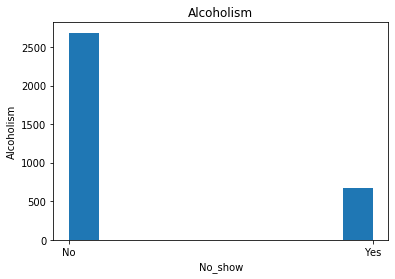

In [244]:
create_hist(df_alc,'Alcoholism','No_show', "Alcoholism");

#### 80% of Alcoholism patients showed-up, while 20% of them didn't show-up.

### 4.4 Handcap

In [245]:

df_hcap = df[df['Handcap'] >= 1]
pd.crosstab(df_hcap['No_show'], df_hcap['Handcap'], rownames=['No_show'], colnames=['Handcap'], normalize='index').round(2)


Handcap,1,2,3,4
No_show,,,,
No,0.91,0.08,0.01,0.0
Yes,0.90,0.09,0.01,0.0


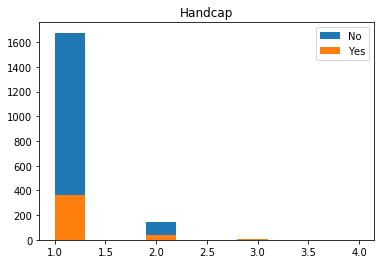

In [246]:
for name, group in df_hcap.groupby('No_show'):
    plt.hist(group['Handcap'], label=name)
    plt.legend()
    plt.title('Handcap');

#### 91% of patients who showed up have Handicap of the 1st type, while 9% of them have Handicap of type 2, 3 and 4.

### Q5. What are the characterstics of patients who showed-up and who didn't?

#### 5.1 Let's mask the dataframe to have patients who showed-up only.

In [247]:
df_showed = df[df.No_show == 'No']

In [248]:
df_showed.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

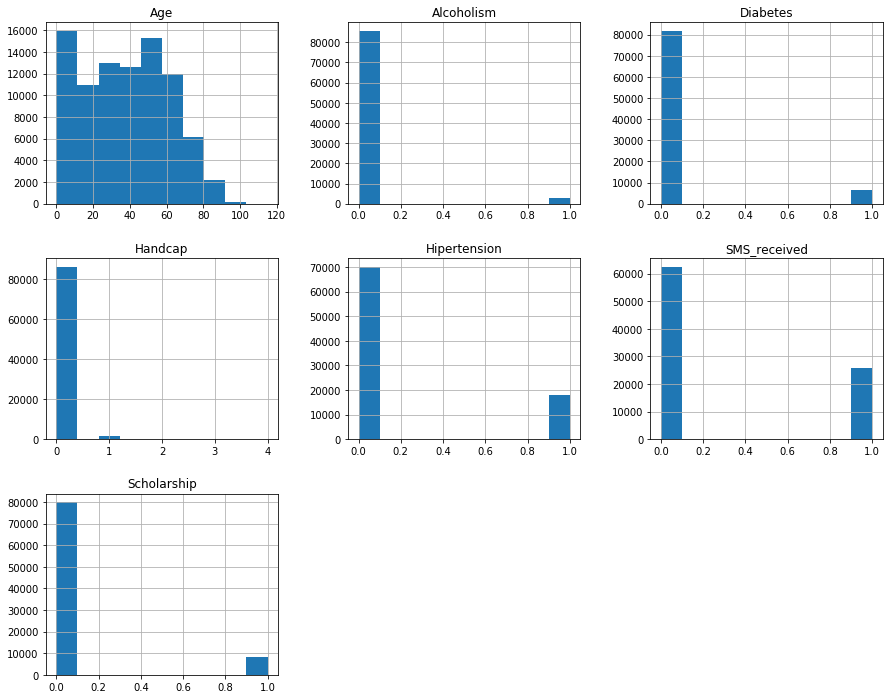

In [249]:
df_showed.hist(column=['Gender', 'Age','Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received'], figsize=(15, 12));

#### 5.2 A new mask of the dataframe to have patients who did NOT show-up.

In [250]:
df_not_showed = df[df.No_show == 'Yes']

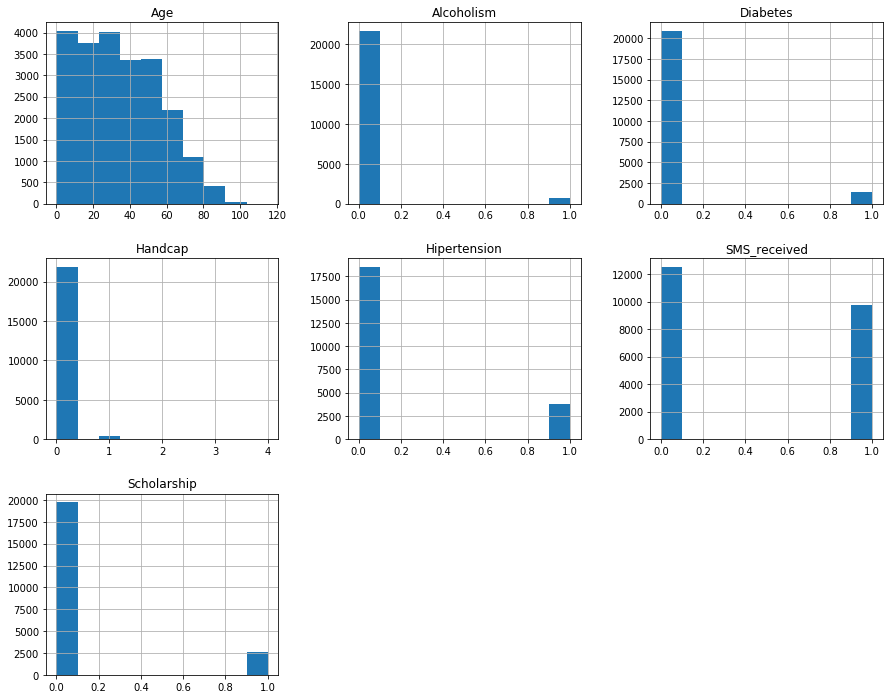

In [251]:
df_not_showed.hist(column=['Gender', 'Age','Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received'], figsize=(15, 12) );

#### It is very clear that patients with diseases are more likiely to show up to appointment, while patients with no diseases are more likely not to show up.

### Q6. The relationship between Patients who showed-up and who received SMS

In [252]:
pd.crosstab(df_sms['SMS_received'], df_sms['No_show'], rownames=['SMS_received'], colnames=['No_show'], normalize='index').round(2)

No_show,No,Yes
SMS_received,,
1,0.72,0.28


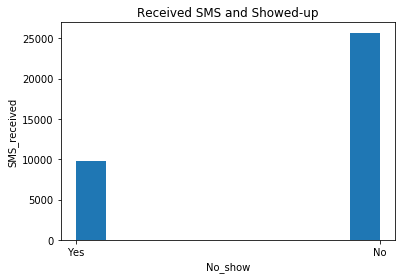

In [253]:
create_hist(df_sms,'SMS_received','No_show', "Received SMS and Showed-up");


#### 72% of patients who recevied SMS have showed-up to the appointment, while 28% haven't.

### Q7. The relationship between Patients who showed-up and have enrolled in Brasilian welfare program

In [254]:
pd.crosstab(df_sch['Scholarship'], df_sch['No_show'], rownames=['Scholarship'], colnames=['No_show'], normalize='index').round(2)

No_show,No,Yes
Scholarship,,
1,0.76,0.24


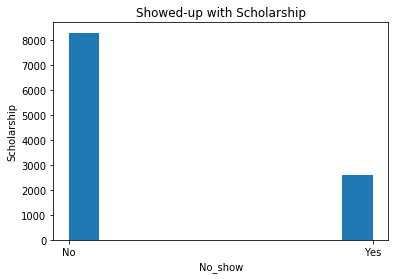

In [255]:
create_hist(df_sch,'Scholarship','No_show', "Showed-up with Scholarship");


#### 76% of patients who have  enrolled in Brasilian welfare program have showed-up to the appointment, while 24% haven't.

<a id='conclusions'></a>
## Conclusions

#### In conclusion, below are the most important findings in this dataset:


##### The average age of all patients is 37.
##### The average age of all patients who showed-up is 37.
#####  The average age of all patients who did not show-up is 34.
##### The average age of all patients who have enrolled in Brasilian welfare program is 30.
##### The average age of all patients who have received SMS is 30.
##### The average age of all patients who have Hipertension is 60.
##### The average age of all patients who have Diabetes is 61.
##### The average age of all patients who are Alcoholism is 49.
##### The average age of all patients who have Handicap is 50.



##### More Females come with disease like Hipertension and Diabetes than males. More males are Alcoholism than females.

##### More females showed up to the appointment than males.


##### Most of patients who have diseases are more likely to show-up to the appointment.

##### Patients who received SMS tend to show-up to the appointment more than patients who did not receive SMS.


##### Patients who have enrolled in Brasilian welfare program tend to show-up to the appointment more than patients who did not enrolled.


## The limitations that I faced during my exploration:
#### Most of the variables are binary.
#### Total number of Females is twice the number of Males, this could have biased my analysis.
#### No more data to specify the other appointments after the 1st appointment (if exist).

## /***********End of code.********************************/